In [7]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 5.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install numpy==1.23.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.1
    Uninstalling numpy-1.26.1:
      Successfully uninstalled numpy-1.26.1
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install hdbscan

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 17.5 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.36-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 12.8 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp39-cp39-linux_x86_64.whl size=3110959 sha256=93f95c6d3365a079ad33850206f6fb1e386ad65f28cb80cad21e7df937ecd80b
  Stored in directory: /home/miroliaei/.cache/pip/wheels/28/5e/ed/5989da4cc423a222a47cbb4fde5d6c0eff4590d922e45f233c
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.

In [4]:
pip install --upgrade bottleneck

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.1/353.1 kB 6.4 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade numexpr

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 6.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import cv2
import numpy as np

# Define the directory path containing image files
data_directory = "LRP_Results/LRPSequentialPresetAAnalysis/woman3"

# Initialize an empty list to store the loaded images
X = []

# Loop through all image files in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(('.png')):  # Adjust file extensions as needed
        file_path = os.path.join(data_directory, filename)
        image = cv2.imread(file_path)  # Load the image
        if image is not None:
            X.append(image)

# Convert the list of images into a NumPy array
X = np.array(X)

# At this point, X contains your image data
X.shape

(2000, 50, 50, 3)

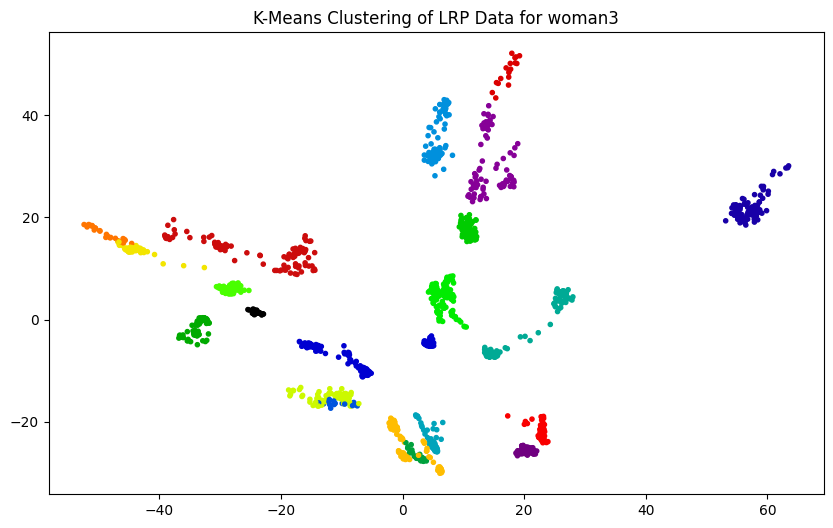

Cluster 0: 100 samples
Cluster 1: 100 samples
Cluster 2: 82 samples
Cluster 3: 100 samples
Cluster 4: 221 samples
Cluster 5: 18 samples
Cluster 6: 100 samples
Cluster 7: 100 samples
Cluster 8: 100 samples
Cluster 9: 43 samples
Cluster 10: 100 samples
Cluster 11: 100 samples
Cluster 12: 200 samples
Cluster 13: 100 samples
Cluster 14: 82 samples
Cluster 15: 73 samples
Cluster 16: 136 samples
Cluster 17: 27 samples
Cluster 18: 100 samples
Cluster 19: 18 samples
Cluster 20: 100 samples


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

# Define the folder path for woman3
woman3_folder = os.path.join(os.getcwd(), "LRP_Results/LRPSequentialPresetAAnalysis/woman3")

# Load and preprocess LRP analysis data for woman3
X_woman3 = []

for i in range(10000, 12000):
    image_path = os.path.join(woman3_folder, f"image_{i}.png")
    image = Image.open(image_path)
    image_array = np.array(image)
    X_woman3.append(image_array)

# Reshape the data if needed (e.g., from (2000, 50, 50, 3) to (2000, 7500))
X_woman3 = np.array(X_woman3).reshape(len(X_woman3), -1)

# Feature scaling (optional but recommended for K-Means)
scaler = StandardScaler()
X_woman3 = scaler.fit_transform(X_woman3)

# Apply K-Means clustering
num_clusters = 21
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_woman3)

# Apply PCA for visualization (reducing dimensionality to 2 for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_woman3)

# Visualize the clustered data
plt.figure(figsize=(10, 6))
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / num_clusters)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, marker='.')
plt.title('K-Means Clustering of LRP Data for woman3')
plt.show()

# Interpret clusters
for cluster in range(num_clusters):
    cluster_data = X_woman3[cluster_labels == cluster]
    # Analyze and interpret the cluster_data to determine relevant features
    print(f'Cluster {cluster}: {len(cluster_data)} samples')

# Optionally, you can build a classification model using relevant features


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f16e724f160>
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/usr/lib/python3/dist-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/usr/lib/python3/dist-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/usr/lib/python3/dist-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f16e724f160>
Traceback (most recent call last):
  File 

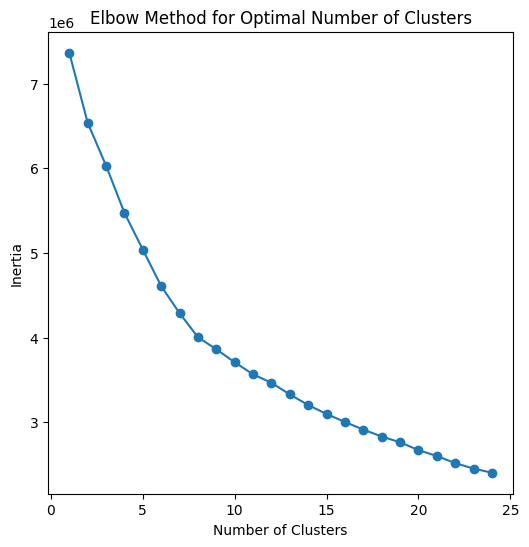

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image

# Define the folder path for woman3
woman3_folder = os.path.join(os.getcwd(), "LRP_Results/LRPSequentialPresetAAnalysis/woman3")

# Load and preprocess LRP analysis data for woman3
X_woman3 = []

for i in range(10000, 12000):
    image_path = os.path.join(woman3_folder, f"image_{i}.png")
    image = Image.open(image_path)
    image_array = np.array(image)
    X_woman3.append(image_array)

# Reshape the data if needed (e.g., from (2000, 50, 50, 3) to (2000, 7500))
X_woman3 = np.array(X_woman3).reshape(len(X_woman3), -1)

# Feature scaling (optional but recommended for K-Means)
scaler = StandardScaler()
X_woman3 = scaler.fit_transform(X_woman3)

# Automatically detect the number of clusters using the Elbow Method
inertia_values = []
possible_cluster_counts = range(1, 25)  # You can adjust the range

for num_clusters in possible_cluster_counts:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X_woman3)
    inertia_values.append(kmeans.inertia_)






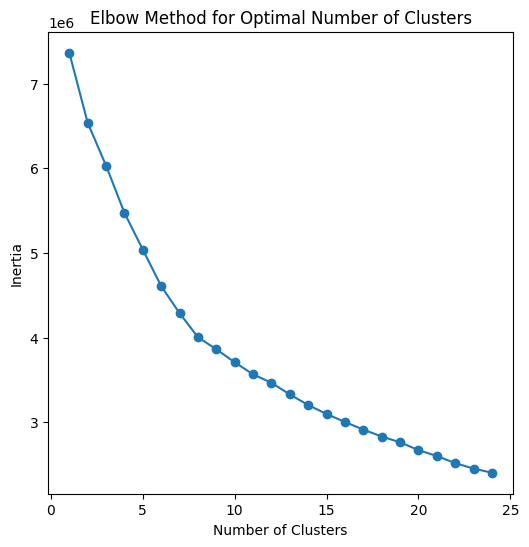

In [18]:
# Plot the Elbow Method curve to determine the optimal number of clusters
plt.figure(figsize=(6, 6))
plt.plot(possible_cluster_counts, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

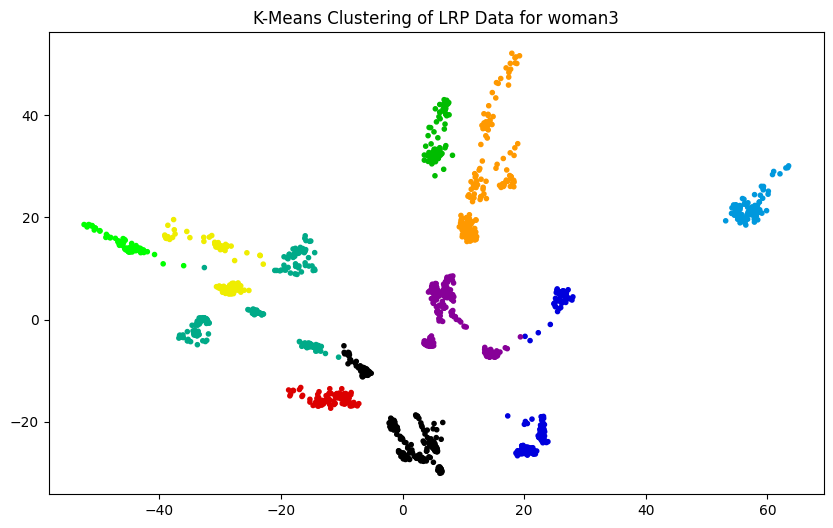

Cluster 0: 359 samples
Cluster 1: 358 samples
Cluster 2: 242 samples
Cluster 3: 100 samples
Cluster 4: 297 samples
Cluster 5: 100 samples
Cluster 6: 99 samples
Cluster 7: 145 samples
Cluster 8: 200 samples
Cluster 9: 100 samples


In [12]:
# Choose the optimal number of clusters based on the Elbow Method (manually)
# In this example, you can visually inspect the curve and select a suitable number of clusters.

# Perform K-Means clustering with the chosen number of clusters
optimal_num_clusters = 10  # Adjust based on the Elbow Method plot
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(X_woman3)

# Apply PCA for visualization (reducing dimensionality to 2 for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_woman3)

# Visualize the clustered data
plt.figure(figsize=(10, 6))
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / optimal_num_clusters)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, marker='.')
plt.title('K-Means Clustering of LRP Data for woman3')
plt.show()

# Interpret clusters
for cluster in range(optimal_num_clusters):
    cluster_data = X_woman3[cluster_labels == cluster]
    # Analyze and interpret the cluster_data to determine relevant features
    print(f'Cluster {cluster}: {len(cluster_data)} samples')

# Optionally, you can build a classification model using relevant features

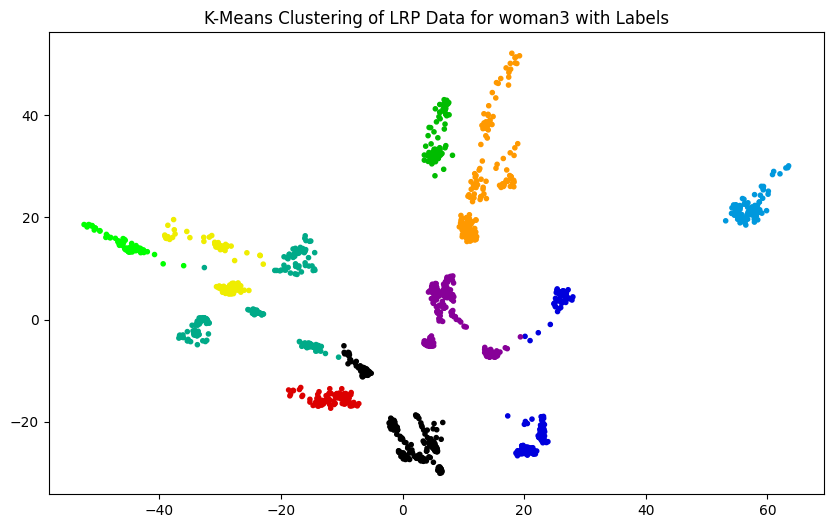

Cluster 01_palm: 359 samples
Cluster 02_l: 358 samples
Cluster 03_fist: 242 samples
Cluster 04_fist_moved: 100 samples
Cluster 05_thumb: 297 samples
Cluster 06_index: 100 samples
Cluster 07_ok: 99 samples
Cluster 08_palm_moved: 145 samples
Cluster 09_c: 200 samples
Cluster 10_down: 100 samples


In [16]:
# Assign labels to clusters based on CATEGORIES list
CATEGORIES = ["01_palm", '02_l', '03_fist', '04_fist_moved', '05_thumb', '06_index', '07_ok', '08_palm_moved', '09_c', '10_down']
cluster_names = [CATEGORIES[cluster] for cluster in cluster_labels]

# Apply PCA for visualization (reducing dimensionality to 2 for plotting)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_woman3)

# Visualize the clustered data with labels
plt.figure(figsize=(10, 6))
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / optimal_num_clusters)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, marker='.')
#for i, label in enumerate(cluster_names):
    #plt.annotate(label, (X_pca[i, 0], X_pca[i, 1]))
plt.title('K-Means Clustering of LRP Data for woman3 with Labels')
plt.show()

# Interpret clusters
for cluster in range(optimal_num_clusters):
    cluster_data = X_woman3[cluster_labels == cluster]
    # Analyze and interpret the cluster_data to determine relevant features
    print(f'Cluster {CATEGORIES[cluster]}: {len(cluster_data)} samples')

# Optionally, you can build a classification model using relevant features

LRPalpha1beta0 ignore bias

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain]
[clustimage] >INFO> [6000] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain]
[clustimage] >INFO> [6000] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 6000/6000 [00:00<00:00, 8404.33it/s]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Skipping import because import is already performed outside the fit_transform()
[clustimage] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5997.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5999.png'],
      dtype='<U70'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_5997.png',
       'image_5998.png', 'image_5999.png'], dtype='<U14')}


[clustimage] >INFO> Extracted features using [pca]: samples=6000, features=305
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clustimage] >INFO> Evaluate using dbindex.
[clusteval] >INFO: 100%|████████████████████████| 22/22 [00:00<00:00, 37.17it/s]
[clustimage] >INFO> Compute dendrogram threshold.
[clustimage] >INFO> Optimal number clusters detected: [23].
[clustimage] >INFO> Fin.
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (6000, 305) feature-space.


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])


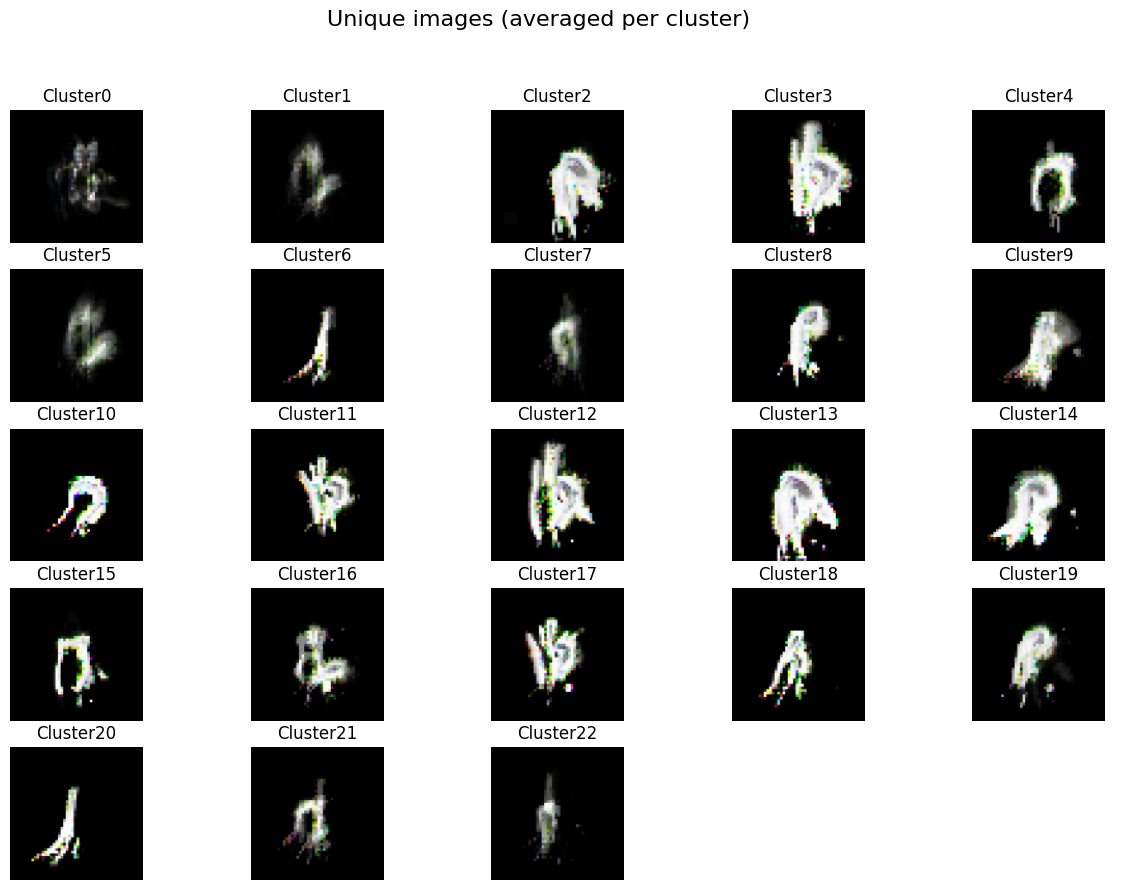

In [8]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
X=WomenTainPreClusteredData
Z=WomenTainPreClusteredData
results = cl.fit_transform(Z,evaluate='dbindex')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')

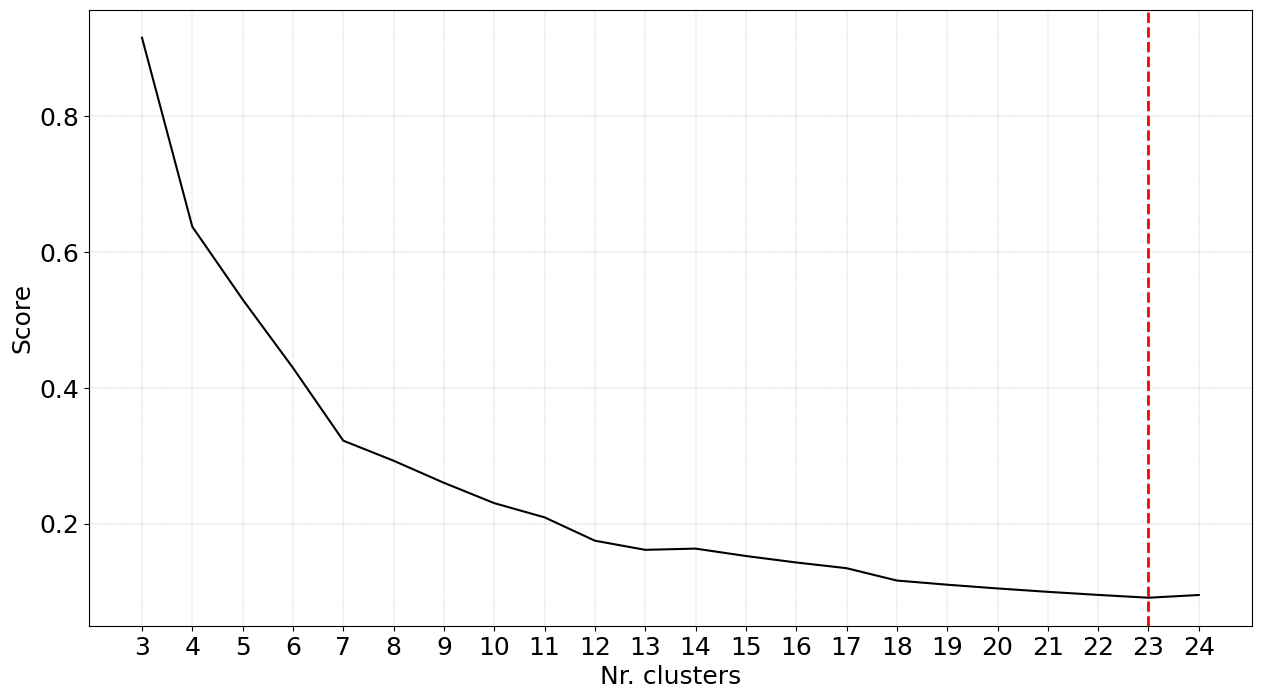

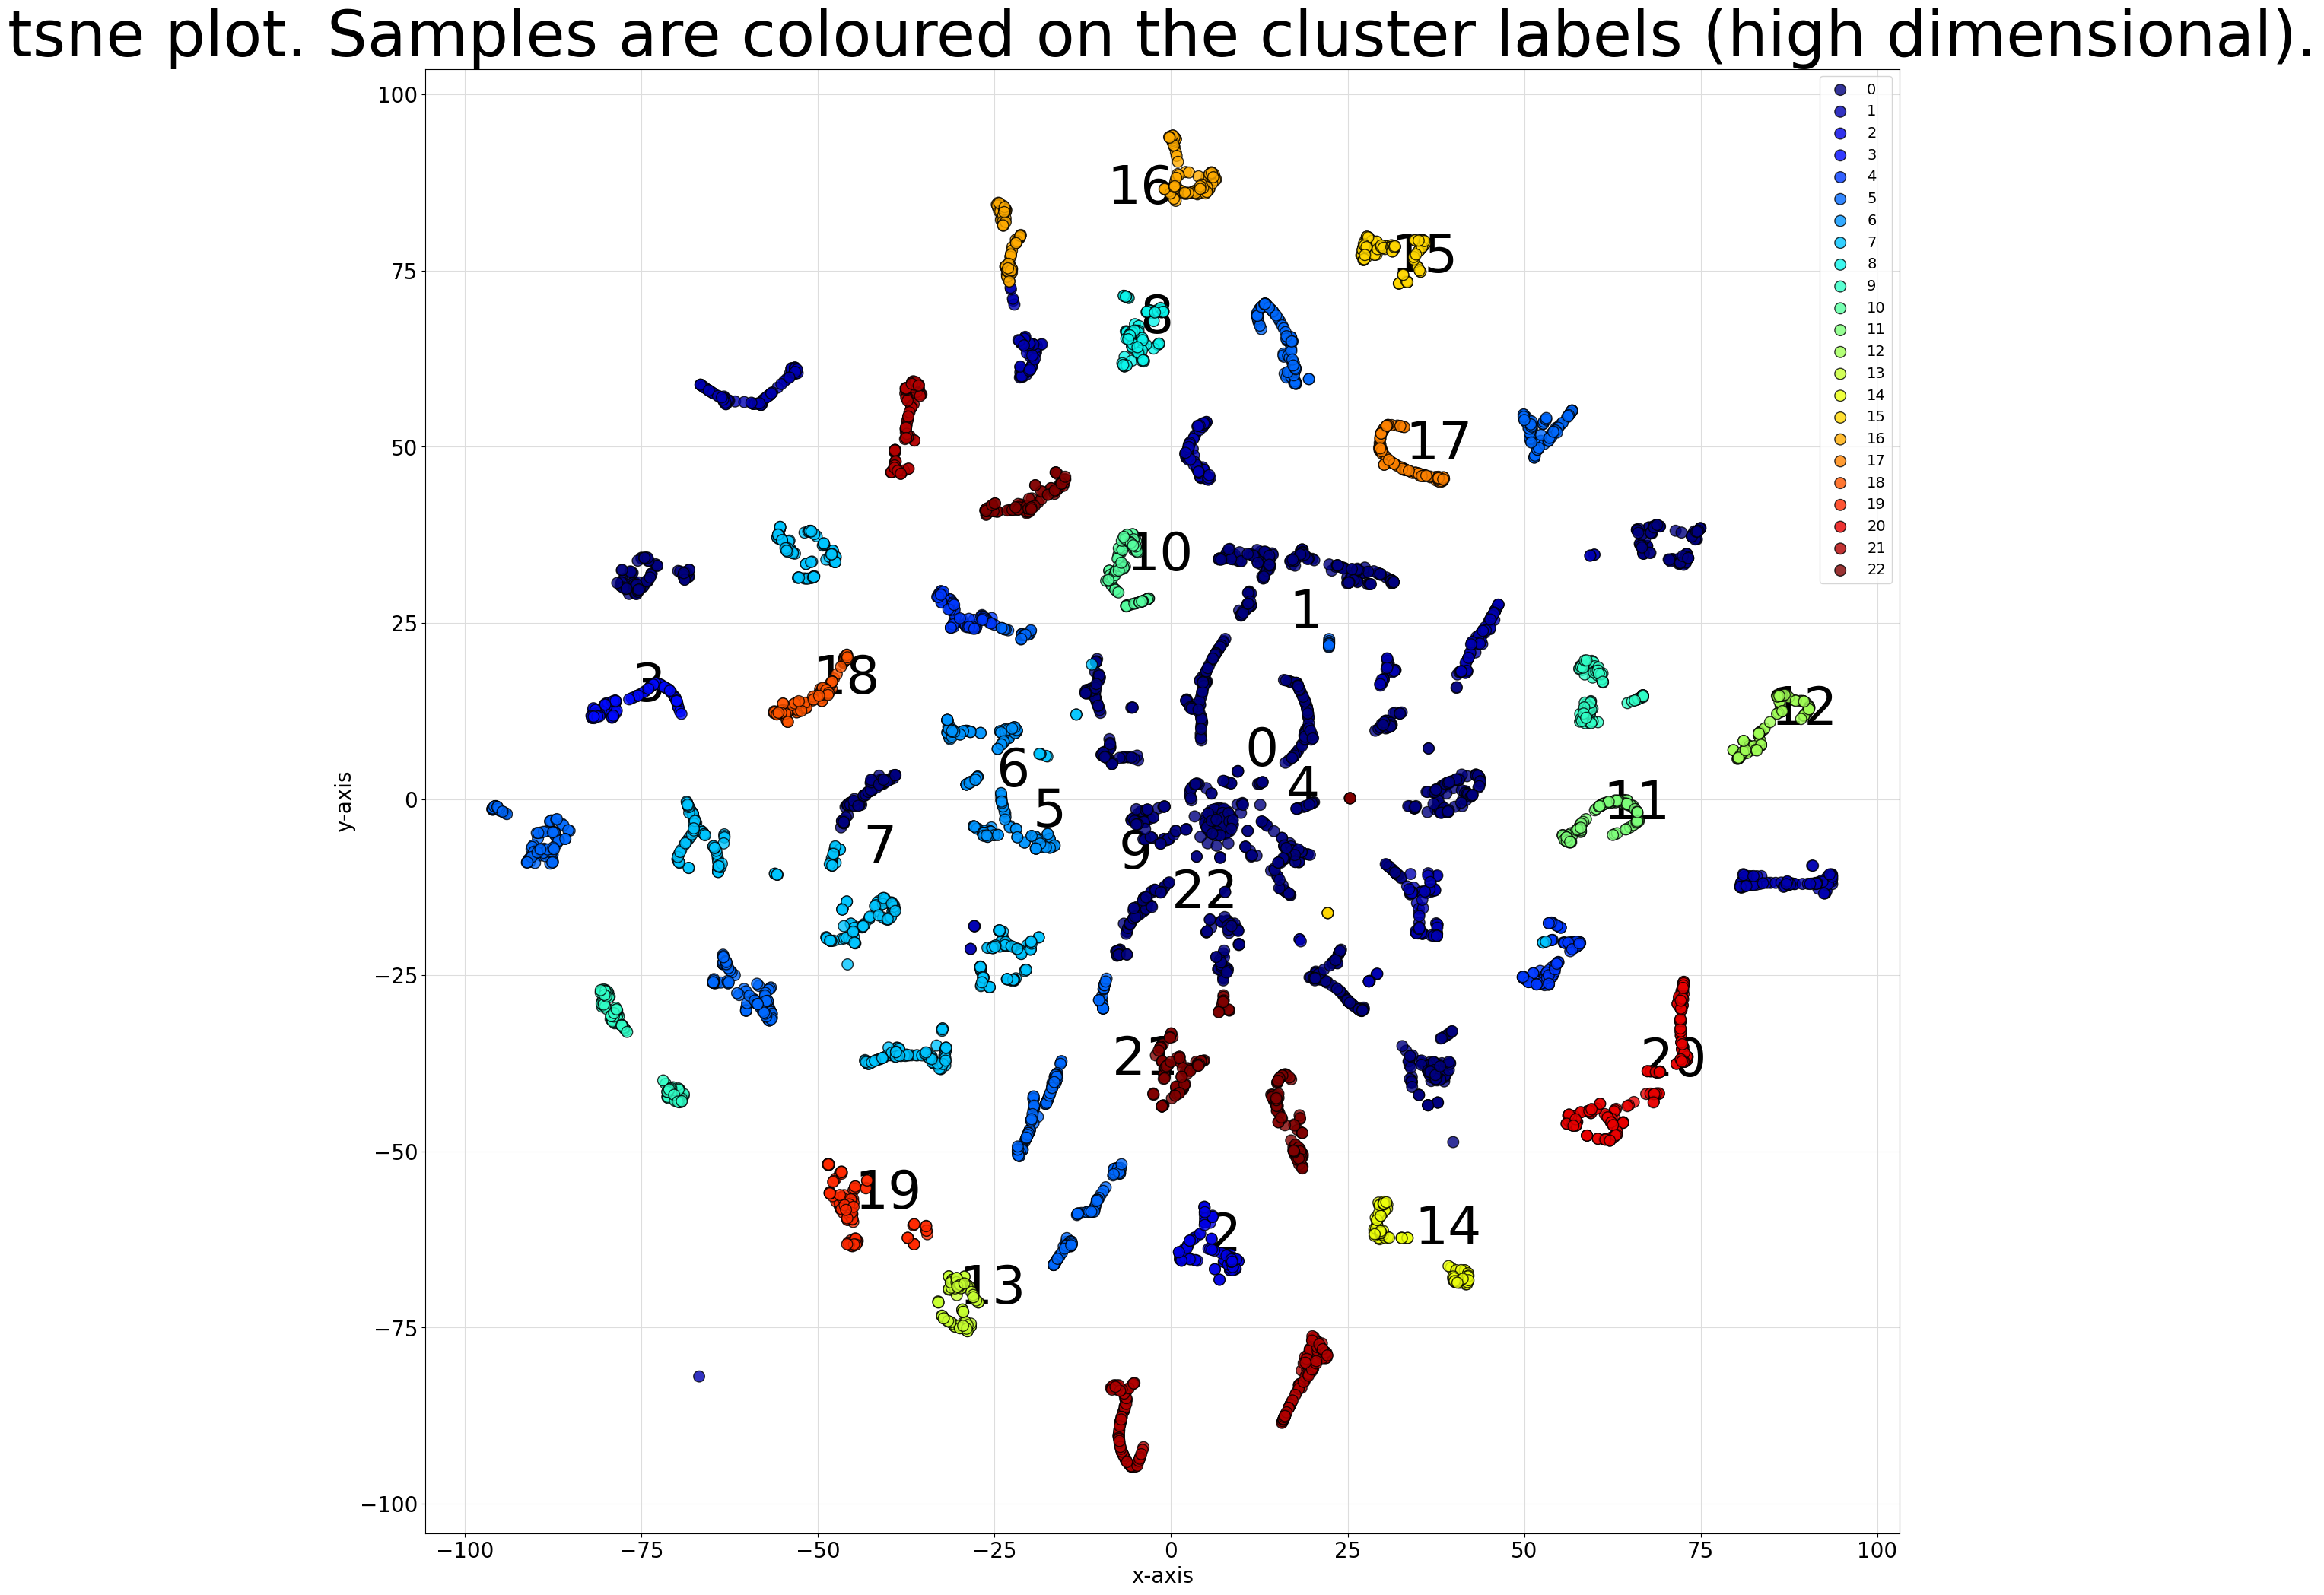

(<Figure size 2500x2500 with 1 Axes>,
 <Axes: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [10]:
cl.clusteval.plot()
# Lets change some more arguments to make a pretty scatterplot
cl.scatter(zoom=None, dotsize=110, figsize=(25, 25), args_scatter={'fontsize':50, 'cmap':'jet', 'legend':True})

[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain]
[clusteval] >INFO> [6000] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain]
[clusteval] >INFO> [6000] images are extracted.
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 6000/6000 [00:00<00:00, 8377.93it/s]
[clusteval] >INFO> Cleaning previous fitted model results
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Skipping import because import is already performed outside the fit_transform()
[clusteval] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5997.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5999.png'],
      dtype='<U70'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_5997.png',
       'image_5998.png', 'image_5999.png'], dtype='<U14')}


[clusteval] >INFO> Extracted features using [pca]: samples=6000, features=305
[clusteval] >INFO> Compute [tsne] embedding
[clusteval] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[hdbscan], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Estimated number of clusters: 376
[clusteval] >INFO> Silhouette Coefficient: 0.113
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [377].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Updating cluster-labels and cluster-model based on the (6000, 305) feature-space.


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])


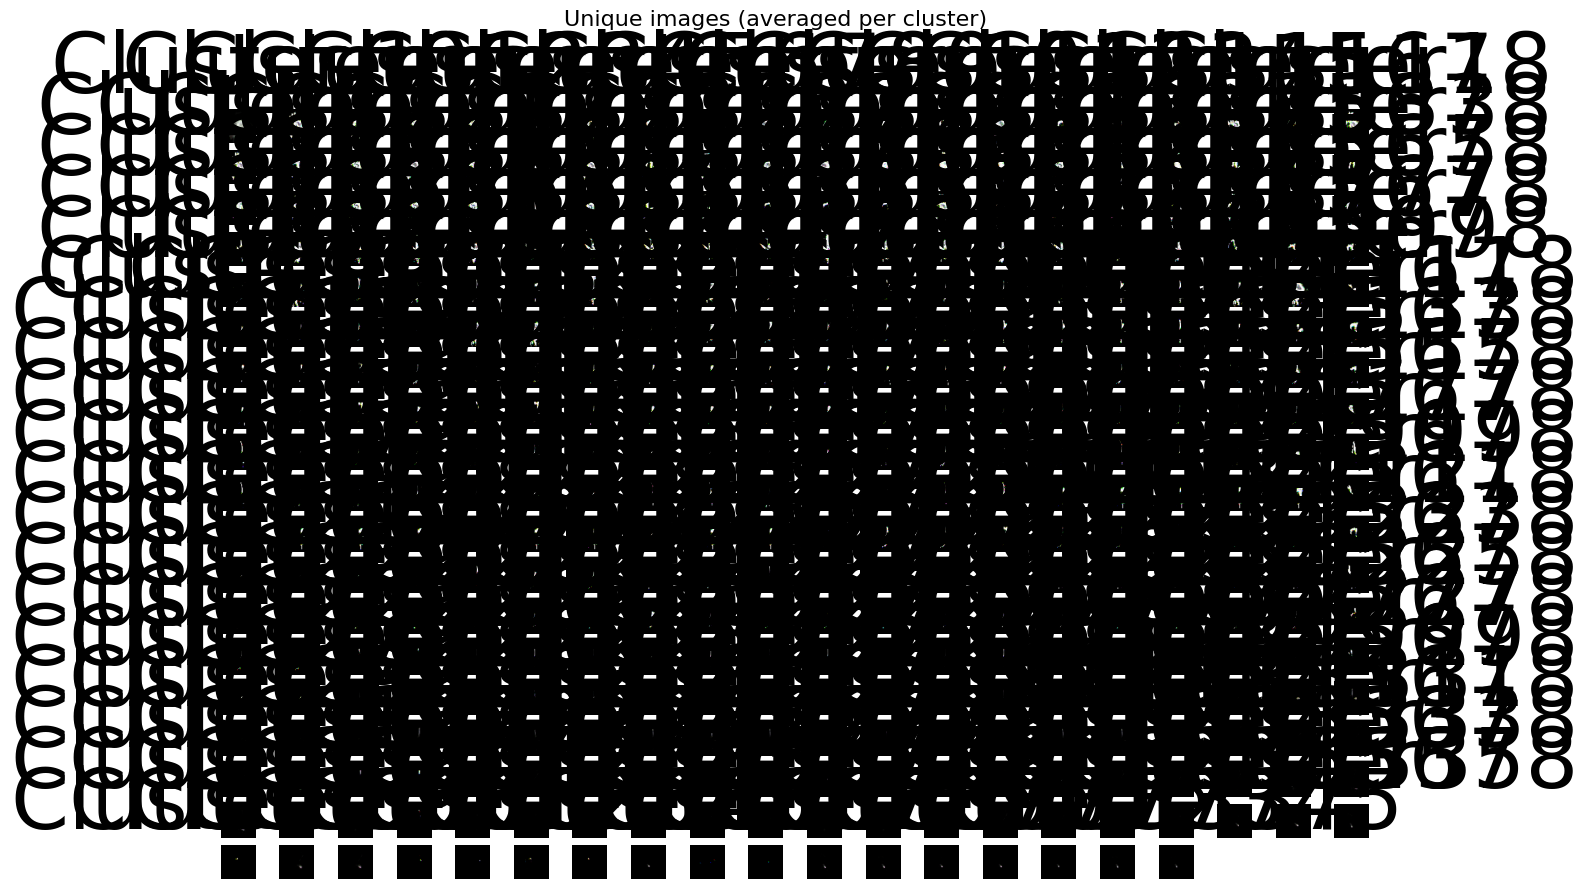

In [5]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
X=WomenTainPreClusteredData
Z=WomenTainPreClusteredData
results = cl.fit_transform(Z,cluster='hdbscan',evaluate='dbindex')
# Get the unique images
unique_samples = cl.unique()
cl.plot_unique(cmap='Set2')

[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain]
[clusteval] >INFO> [6000] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain]
[clusteval] >INFO> [6000] images are extracted.
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 6000/6000 [00:00<00:00, 8278.66it/s]
[clusteval] >INFO> Cleaning previous fitted model results
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Skipping import because import is already performed outside the fit_transform()
[clusteval] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5997.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain/image_5999.png'],
      dtype='<U70'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_5997.png',
       'image_5998.png', 'image_5999.png'], dtype='<U14')}


[clusteval] >INFO> Extracted features using [pca]: samples=6000, features=305
[clusteval] >INFO> Compute [tsne] embedding
[clusteval] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[hdbscan], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Estimated number of clusters: 363
[clusteval] >INFO> Silhouette Coefficient: 0.107
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [364].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Updating cluster-labels and cluster-model based on the (6000, 305) feature-space.


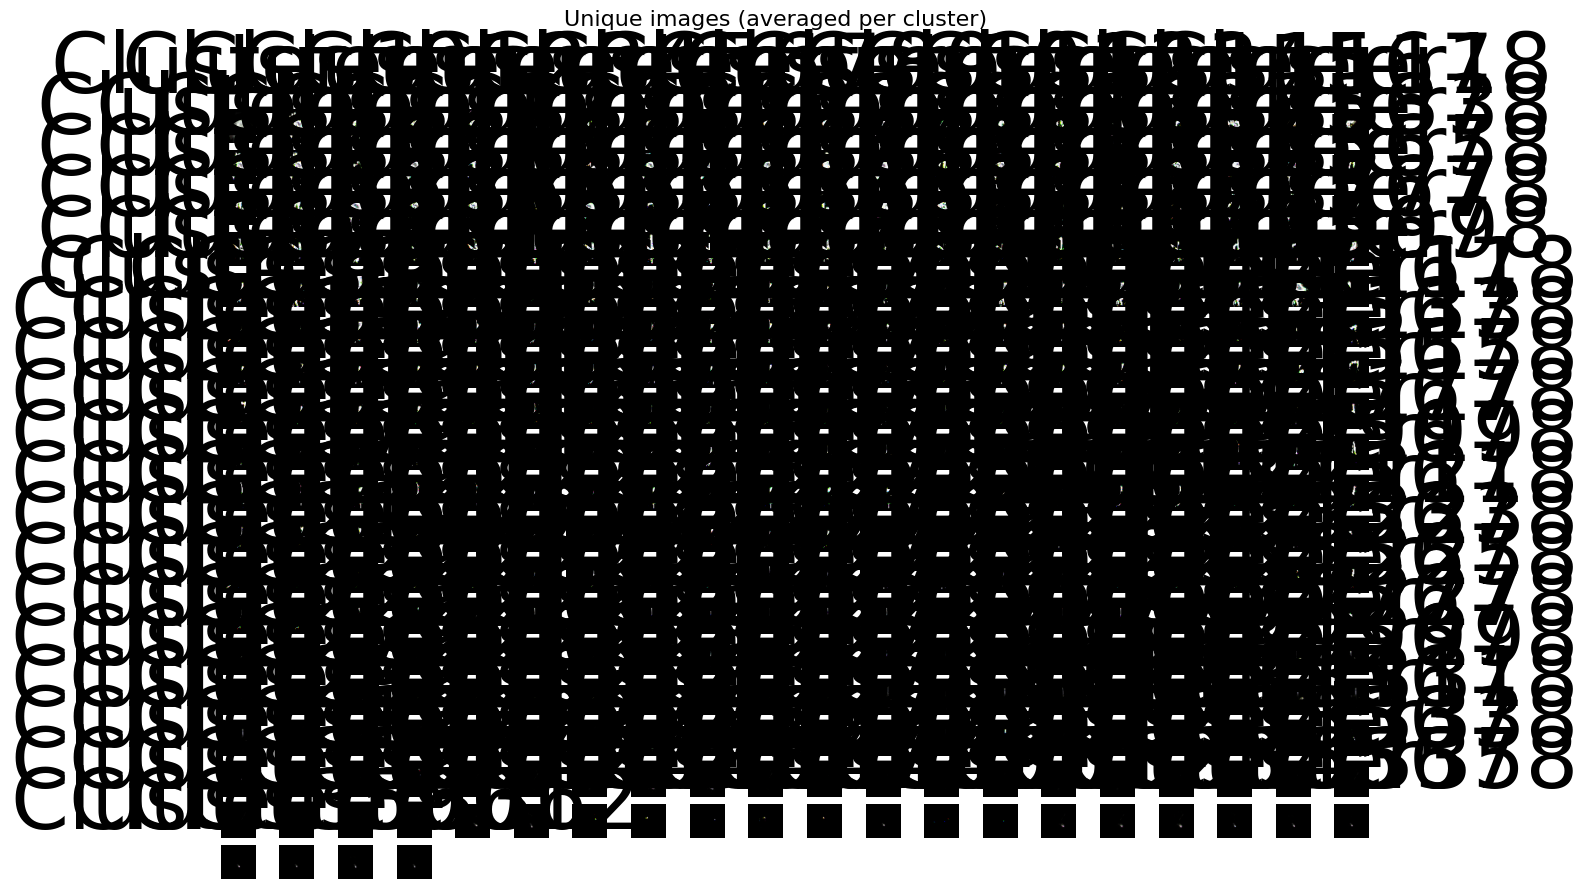

In [7]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomenTrain')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
X=WomenTainPreClusteredData
Z=WomenTainPreClusteredData
results = cl.fit_transform(Z,cluster='hdbscan',evaluate='silhouette')
# Get the unique images
cl.plot_unique(cmap='Set2')

[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/]
[clusteval] >INFO> [4001] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/]
[clusteval] >INFO> [4001] images are extracted.
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 4001/4001 [00:00<00:00, 8208.08it/s]
[clusteval] >INFO> Cleaning previous fitted model results
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Skipping import because import is already performed outside the fit_transform()
[clusteval] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_3998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_3999.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_4000.png'],
      dtype='<U69'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_3998.png',
       'image_3999.png', 'image_4000.png'], dtype='<U14')}


[clusteval] >INFO> Extracted features using [pca]: samples=4001, features=263
[clusteval] >INFO> Compute [tsne] embedding
[clusteval] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using dbindex.
[clusteval] >INFO: 100%|████████████████████████| 22/22 [00:00<00:00, 53.47it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [24].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Updating cluster-labels and cluster-model based on the (4001, 263) feature-space.


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])


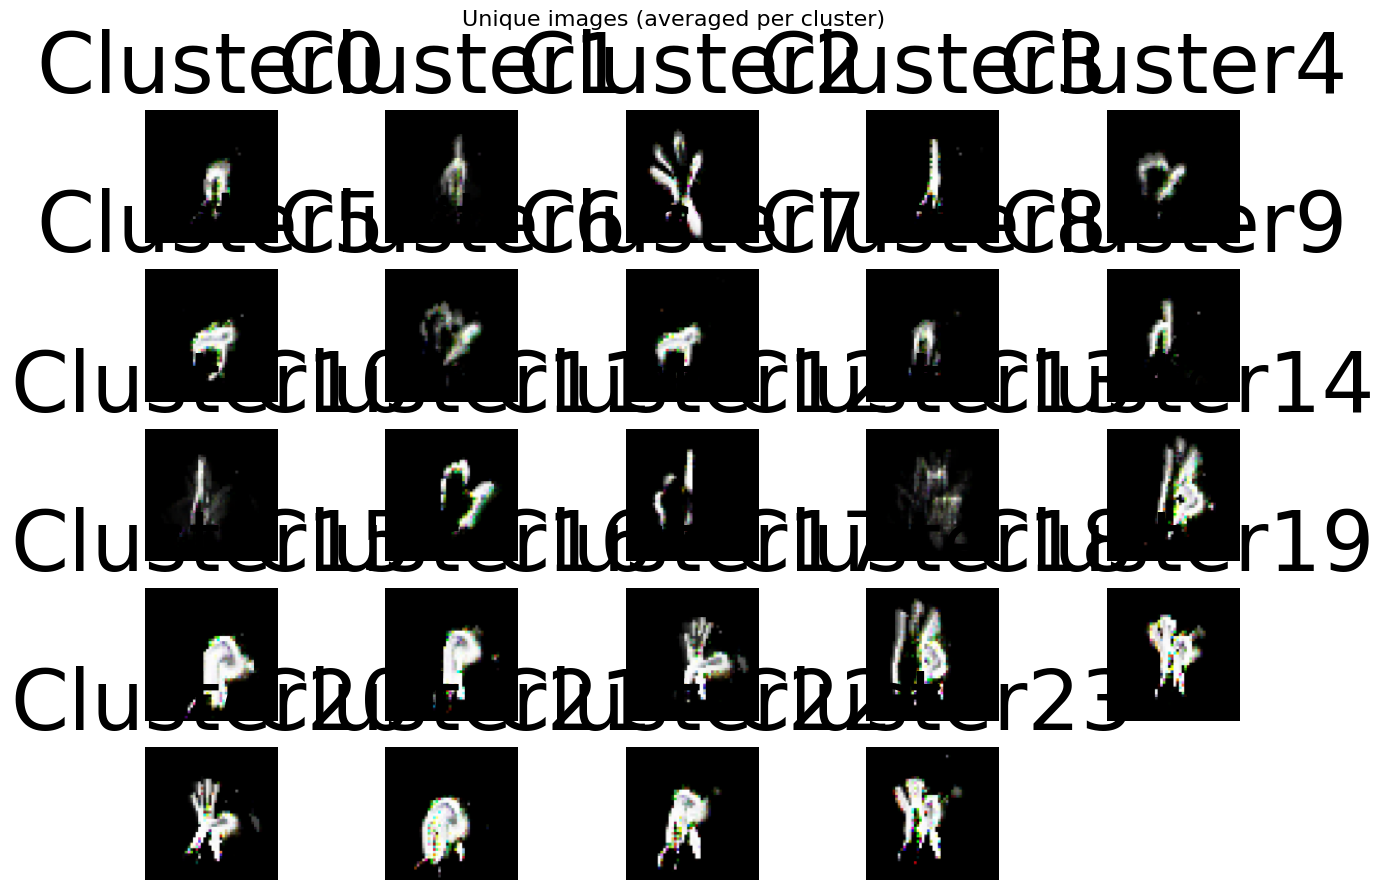

In [9]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
Z=WomenTainPreClusteredData
res = cl.fit_transform(Z,cluster='agglomerative',evaluate='dbindex')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')

[clustimage] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/]
[clustimage] >INFO> [4001] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/]
[clustimage] >INFO> [4001] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 4001/4001 [00:00<00:00, 7983.74it/s]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Skipping import because import is already performed outside the fit_transform()
[clustimage] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_3998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_3999.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_4000.png'],
      dtype='<U69'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_3998.png',
       'image_3999.png', 'image_4000.png'], dtype='<U14')}


[clustimage] >INFO> Extracted features using [pca]: samples=4001, features=263
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clustimage] >INFO> Saving data in memory.
[clustimage] >INFO> Fit with method=[hdbscan], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Estimated number of clusters: 280
[clusteval] >INFO> Silhouette Coefficient: 0.152
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [281].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Updating cluster-labels and cluster-model based on the (4001, 263) feature-space.


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])


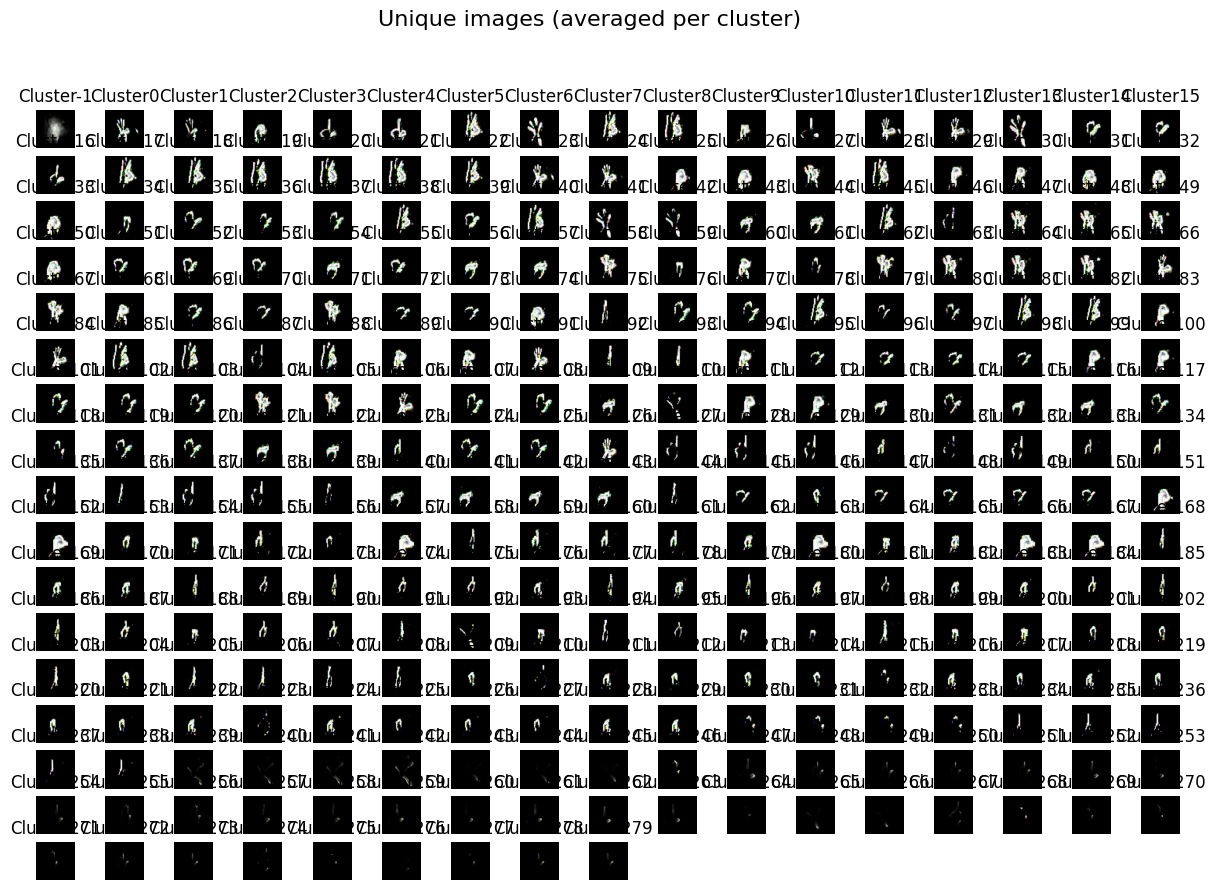

In [1]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
Z=WomenTainPreClusteredData
res = cl.fit_transform(Z,cluster='hdbscan',evaluate='dbindex')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')

[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/]
[clusteval] >INFO> [4001] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/]
[clusteval] >INFO> [4001] images are extracted.
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 4001/4001 [00:00<00:00, 8039.72it/s]
[clusteval] >INFO> Cleaning previous fitted model results
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Skipping import because import is already performed outside the fit_transform()
[clusteval] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_3998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_3999.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/image_4000.png'],
      dtype='<U69'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_3998.png',
       'image_3999.png', 'image_4000.png'], dtype='<U14')}


[clusteval] >INFO> Extracted features using [pca]: samples=4001, features=263
[clusteval] >INFO> Compute [tsne] embedding
[clusteval] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[hdbscan], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Estimated number of clusters: 274
[clusteval] >INFO> Silhouette Coefficient: 0.142
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [275].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Updating cluster-labels and cluster-model based on the (4001, 263) feature-space.


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])


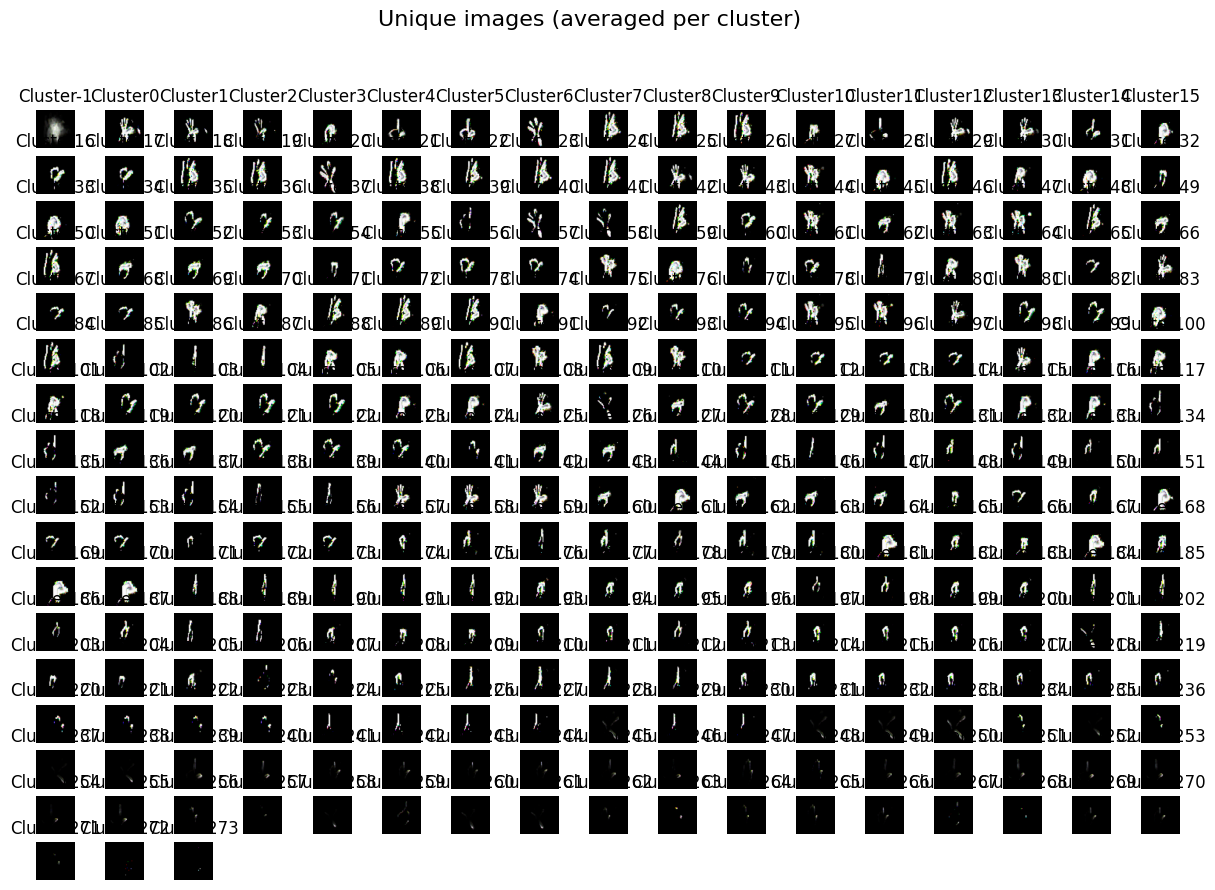

In [2]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/WomanTest/')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
Z=WomenTainPreClusteredData
res = cl.fit_transform(Z,cluster='hdbscan',evaluate='silhouette')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')

[clusteval] >WARNING> Colormap [Set1] can not create [275] unique colors! Available unique colors: [9].
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Create scatterplot


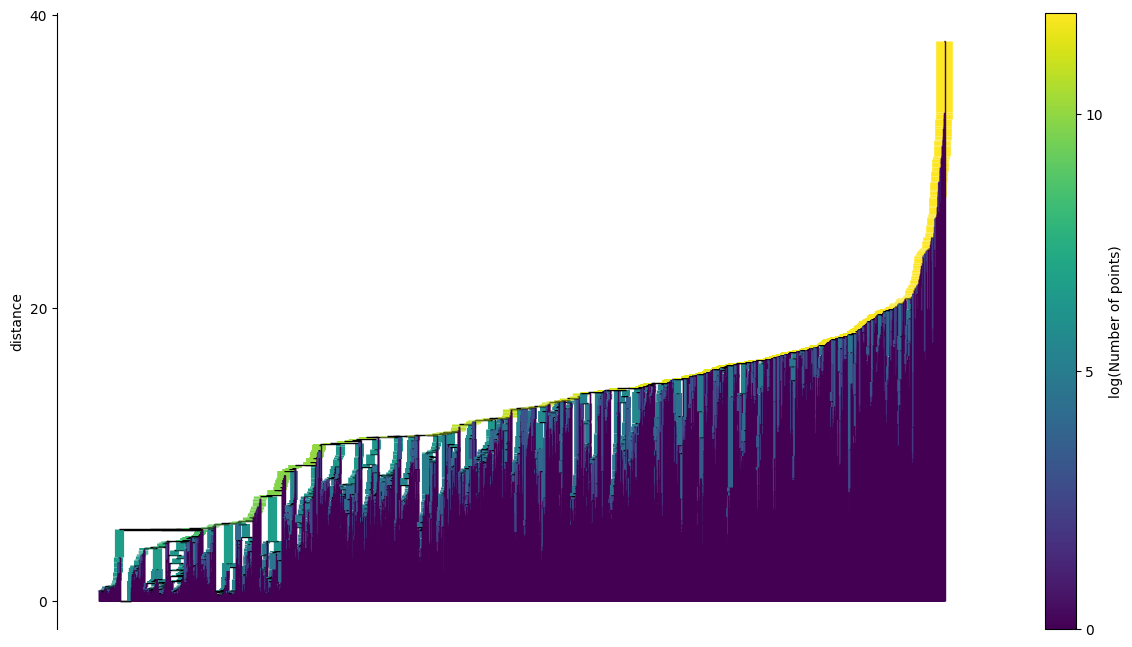

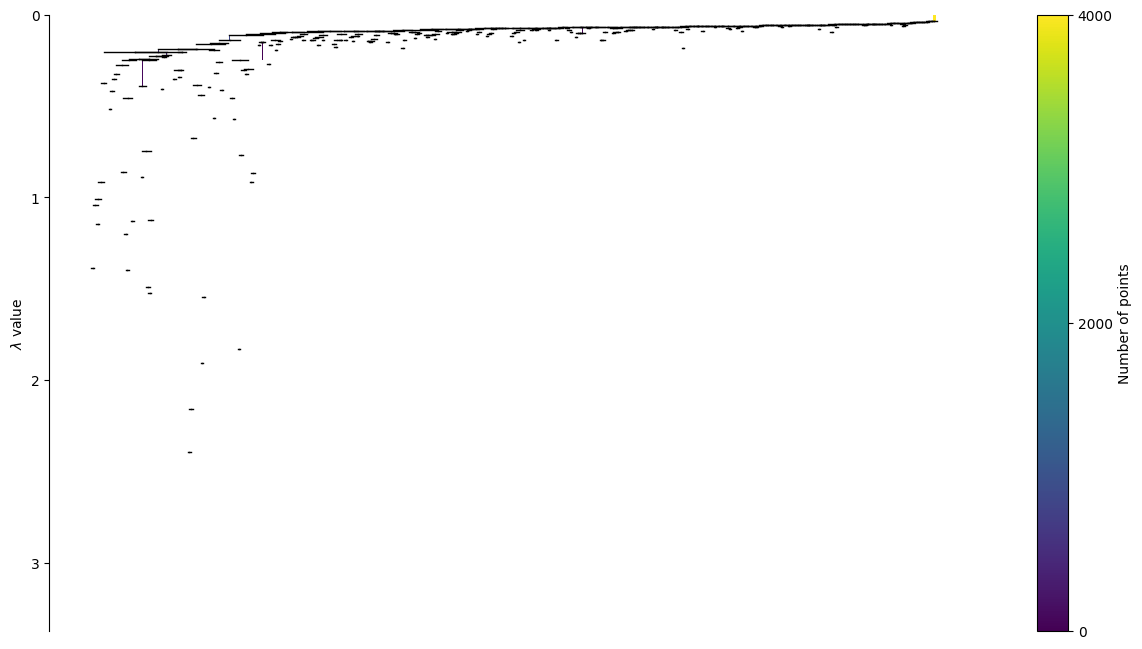

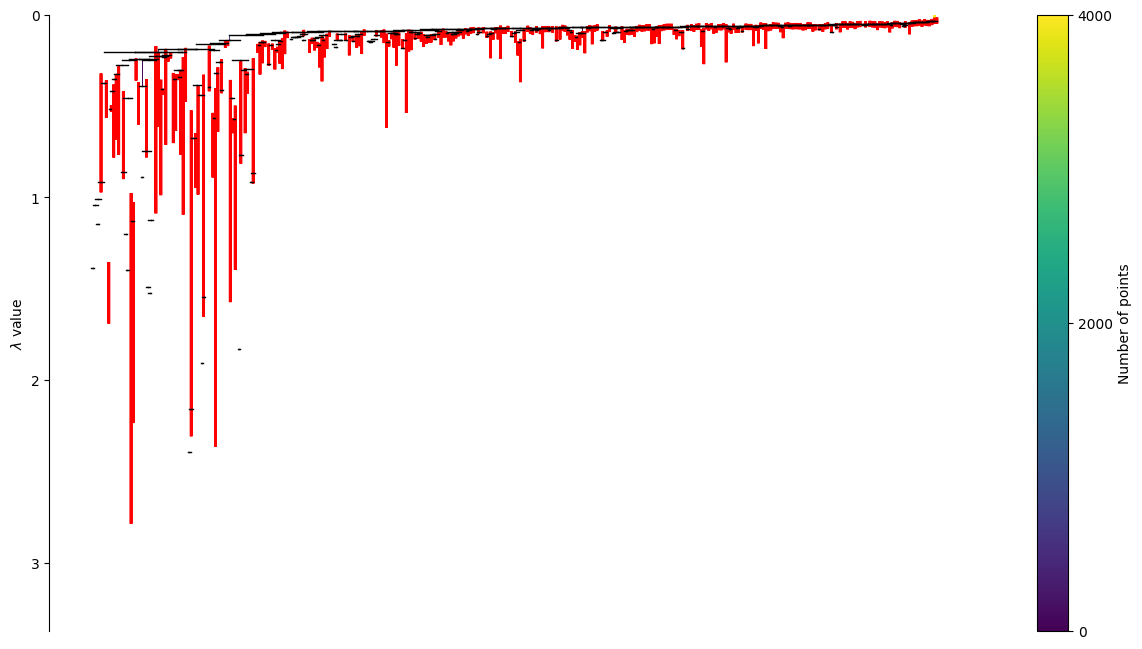

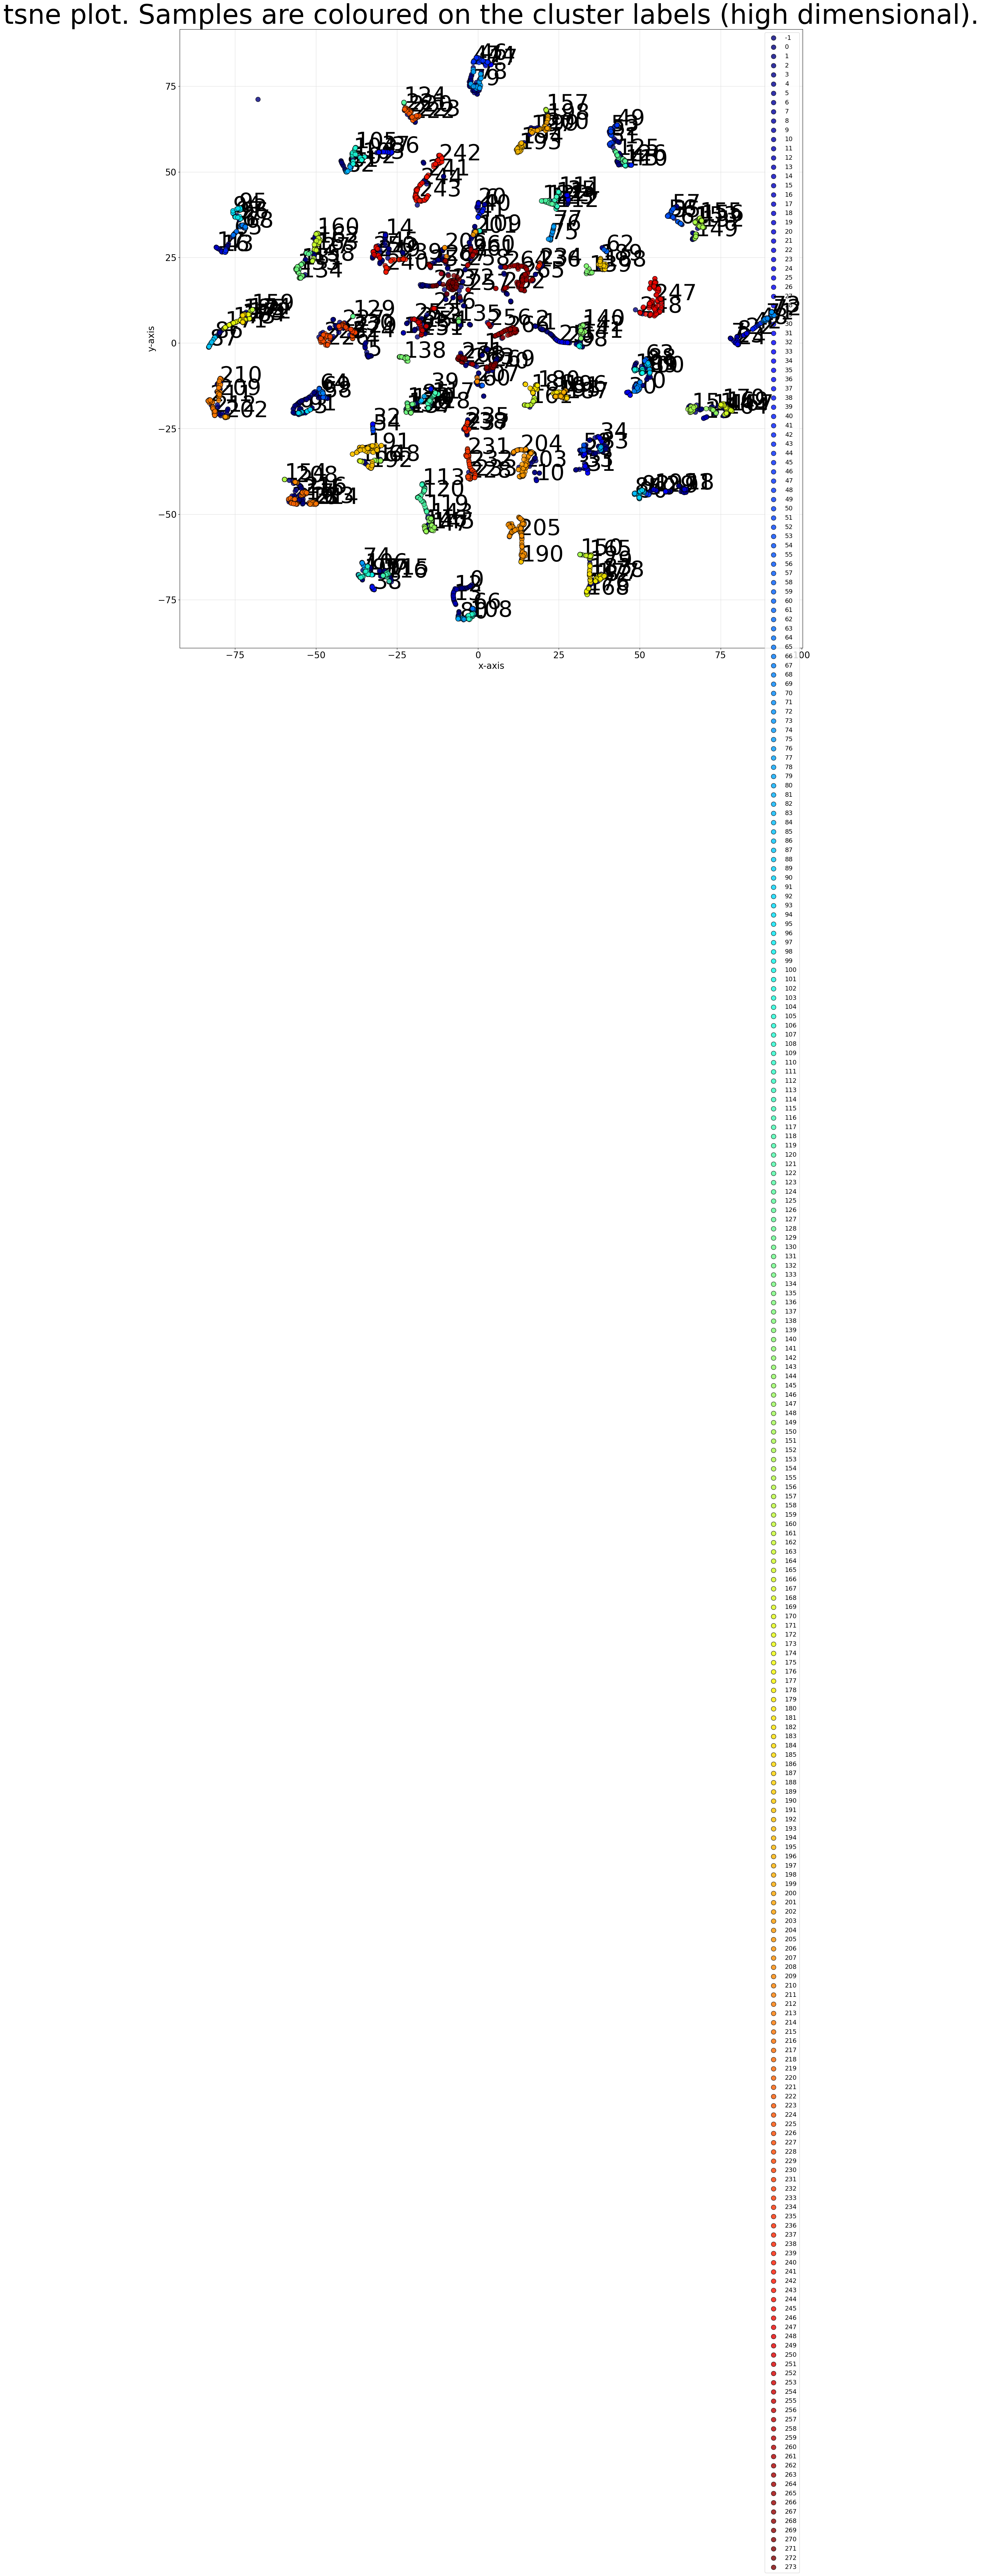

(<Figure size 2500x2500 with 1 Axes>,
 <Axes: title={'center': 'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 640x480 with 0 Axes>

In [3]:
cl.clusteval.plot()
# Lets change some more arguments to make a pretty scatterplot
cl.scatter(zoom=None, dotsize=110, figsize=(25, 25), args_scatter={'fontsize':50, 'cmap':'jet', 'legend':True})

[clusteval] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/]
[clusteval] >INFO> [6000] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/]
[clusteval] >INFO> [6000] images are extracted.
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 6000/6000 [00:00<00:00, 8186.68it/s]
[clusteval] >INFO> Cleaning previous fitted model results
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Skipping import because import is already performed outside the fit_transform()
[clusteval] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/image_5997.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/image_5998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/image_5999.png'],
      dtype='<U68'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_5997.png',
       'image_5998.png', 'image_5999.png'], dtype='<U14')}


[clusteval] >INFO> Extracted features using [pca]: samples=6000, features=278
[clusteval] >INFO> Compute [tsne] embedding
[clusteval] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using dbindex.
[clusteval] >INFO: 100%|████████████████████████| 22/22 [00:00<00:00, 36.05it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [24].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Updating cluster-labels and cluster-model based on the (6000, 278) feature-space.


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])


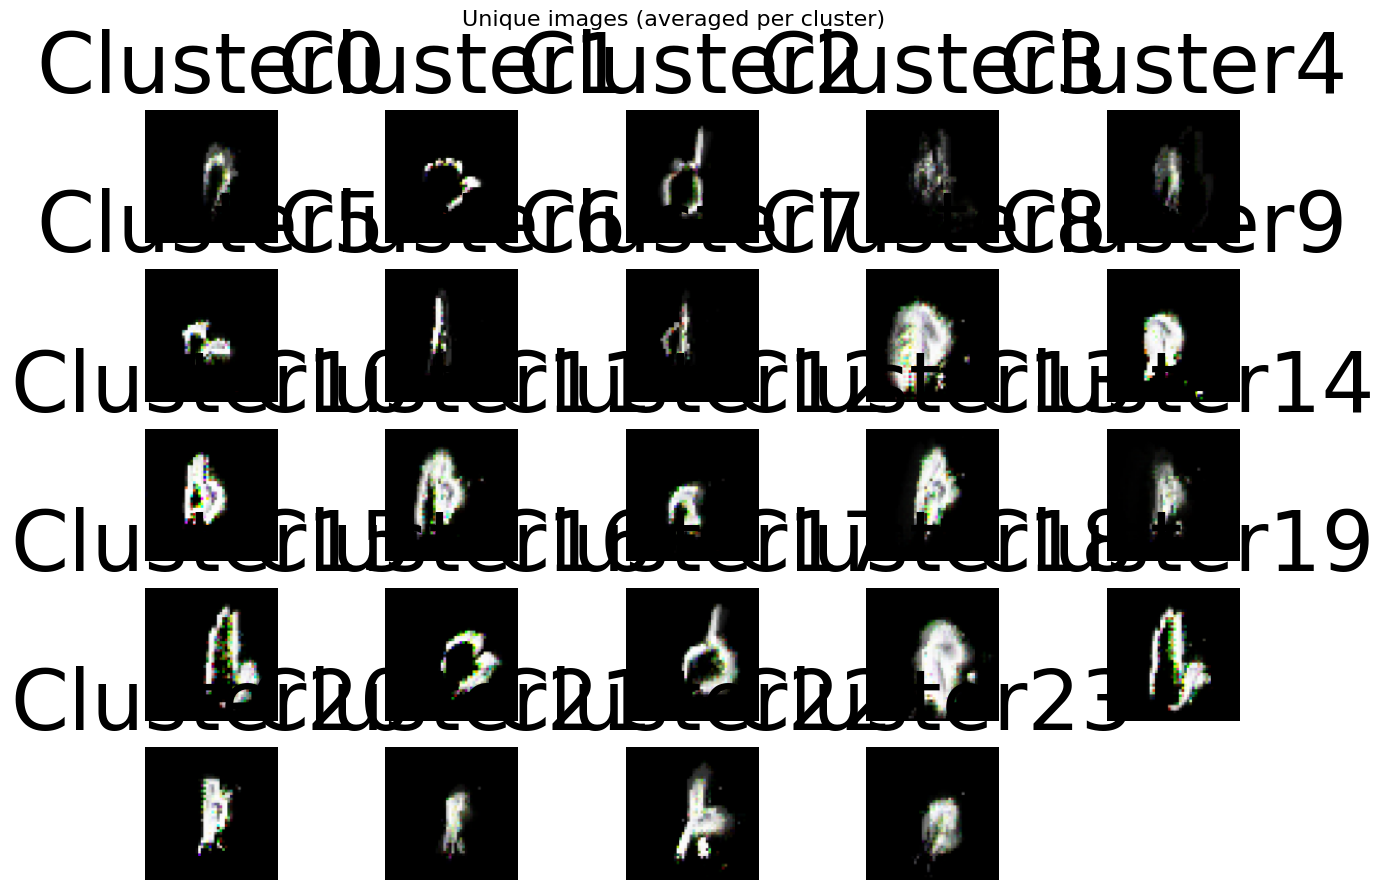

In [4]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
Z=WomenTainPreClusteredData
res = cl.fit_transform(Z,cluster='agglomerative',evaluate='dbindex')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')

[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> filepath is set to [/tmp/clustimage]
[clusteval] >INFO> Extracting images from: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/]
[clusteval] >INFO> [4000] files are collected recursively from path: [LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/]
[clusteval] >INFO> [4000] images are extracted.
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Reading and checking images.
[clustimage]: 100%|███████████████████████| 4000/4000 [00:00<00:00, 7888.73it/s]
[clusteval] >INFO> Cleaning previous fitted model results
[clusteval] >INFO> Reading and checking images.
[clusteval] >INFO> Skipping import because import is already performed outside the fit_transform()
[clusteval] >INFO> Extracting features using method: [pca]


{'img': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'feat': None, 'xycoord': None, 'pathnames': array(['LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/image_0.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/image_1.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/image_2.png',
       ...,
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/image_3997.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/image_3998.png',
       'LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/image_3999.png'],
      dtype='<U67'), 'labels': None, 'url': None, 'filenames': array(['image_0.png', 'image_1.png', 'image_2.png', ..., 'image_3997.png',
       'image_3998.png', 'image_3999.png'], dtype='<U14')}


[clusteval] >INFO> Extracted features using [pca]: samples=4000, features=468
[clusteval] >INFO> Compute [tsne] embedding
[clusteval] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.
[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using dbindex.
[clusteval] >INFO: 100%|████████████████████████| 22/22 [00:00<00:00, 49.90it/s]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [24].
[clusteval] >INFO> Fin.
[clusteval] >INFO> Updating cluster-labels and cluster-model based on the (4000, 468) feature-space.


dict_keys(['labels', 'idx', 'xycoord_center', 'pathnames', 'img_mean'])


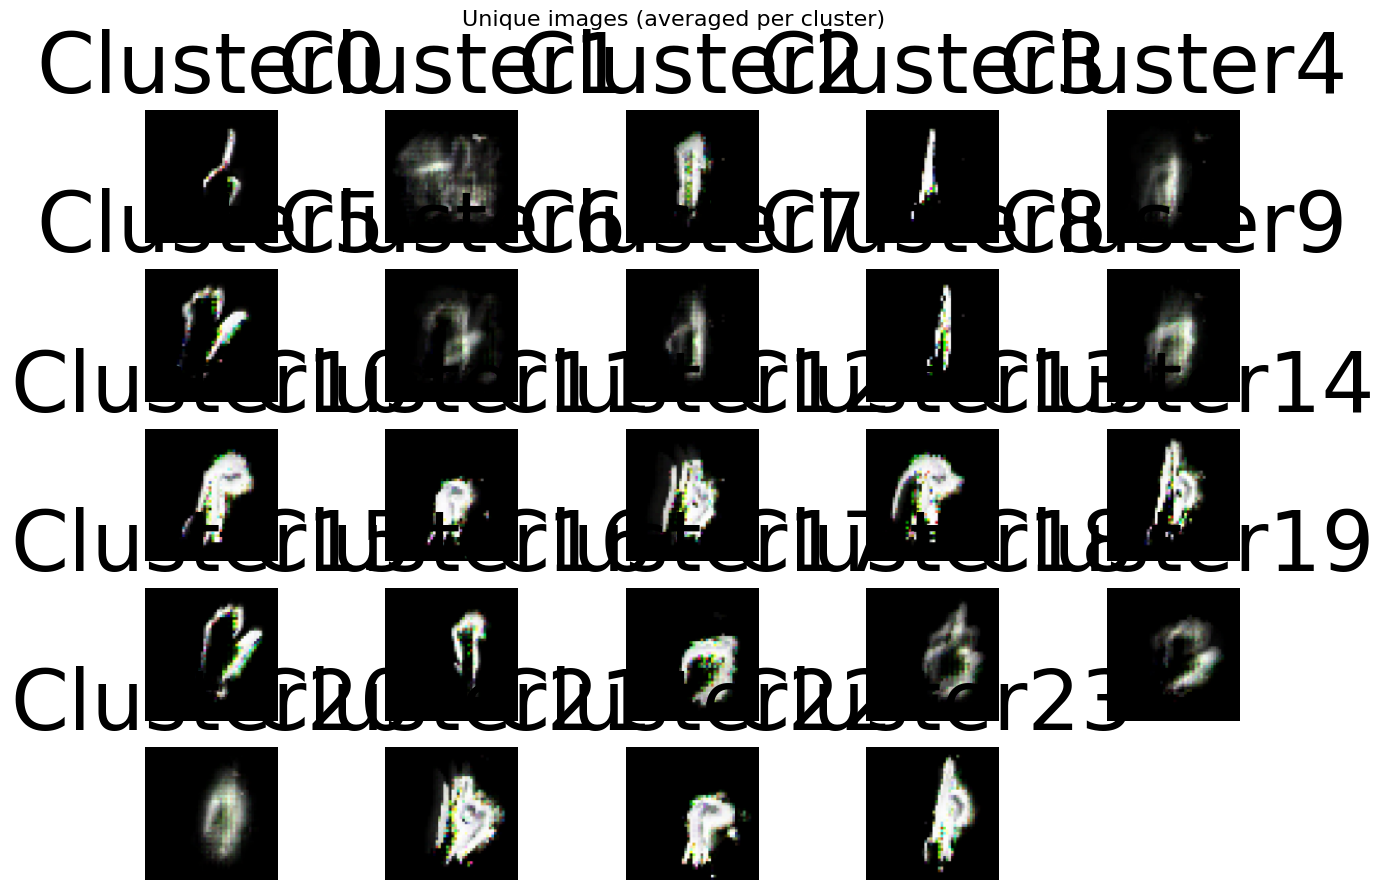

In [8]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTest/')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
Z=WomenTainPreClusteredData
res = cl.fit_transform(Z,cluster='agglomerative',evaluate='dbindex')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')

In [ ]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
Z=WomenTainPreClusteredData
res = cl.fit_transform(Z,cluster='hdbscan',evaluate='dbindex')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')

In [ ]:
import matplotlib.pyplot as plt
from clustimage import Clustimage

# Initialize the Clustimage object
cl = Clustimage(method='pca')

# Load example digit data
WomenTainPreClusteredData = cl.import_data('LRP_Results/LRPAlpha1Beta0IgnoreBiasAnalysis/ManTrain/')

# Check the contents of the returned data
print(WomenTainPreClusteredData)
# Extract features using method
Z=WomenTainPreClusteredData
res = cl.fit_transform(Z,cluster='hdbscan',evaluate='silhouette')
# Get the unique images
unique_samples = cl.unique()
print(unique_samples.keys())
cl.plot_unique(cmap='Set2')